# Face Recognition using VGG16 and SIFT descriptors
based on paper: Face Recognition Using the SR-CNN Model

# Import libraries

In [1]:

import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

import cv2

import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from datetime import datetime
import io
import itertools
from packaging import version



from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

import sklearn.metrics
from tensorflow.keras.optimizers import SGD


In [2]:
def normalize_mean_var(arr):
    arr -= np.mean(arr)
    arr /= np.var(arr)
    return arr

# Loading data

In [3]:
ritf_hist_train_path = "npy_saves/RITF_hist_reduced_128_train_imc_50.npy"
ritf_hist_valid_path = "npy_saves/RITF_hist_reduced_128_valid_imc_50.npy"

X_traing_hists_reduced = np.load(ritf_hist_train_path)
X_valid_hists_reduced = np.load(ritf_hist_valid_path)

In [4]:
y_train_path = "npy_saves/y_train_imc_50.npy"
y_valid_path = "npy_saves/y_valid_imc_50.npy"

y_training = np.load(y_train_path)
y_validation = np.load(y_valid_path)

In [5]:
traing_data_sift_hist = np.load('npy_saves/sift_hist_50m_4k_training.npy')
valid_data_sift_hist = np.load('npy_saves/sift_hist_50m_4k_validation.npy')

# Merging data

In [6]:
def norm_merge(arr1, arr2, alpha):
    a = normalize_mean_var(arr1.astype(np.float32)) * alpha
    b = normalize_mean_var(arr2.astype(np.float32)) * (1-alpha)
    return np.hstack((a, b))

training_data = norm_merge(X_traing_hists_reduced, traing_data_sift_hist, 0.6)
validation_data = norm_merge(X_valid_hists_reduced, valid_data_sift_hist, 0.6)

# Training

In [7]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

def confusion_matrix(model, X_test, y_test, title):
    fig=plt.figure(figsize=(50, 50))
    disp = plot_confusion_matrix(model, X_test, y_test,
                                cmap=plt.cm.Blues,
                                normalize='true')
    disp.ax_.set_title('Confusion matrix: ' + title)

In [8]:
def Linear_SVM_classification(X_train, X_test, y_train, y_test):
    #LinearSVC
    from sklearn.svm import LinearSVC

    svc= LinearSVC(C=100.0, random_state=42, max_iter=1000, verbose=1)
    svc.fit(X_train, y_train)

    svcpred = svc.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, svcpred)
    SVC_acc = metrics.accuracy_score(y_test, svcpred)

    print('Linear SVC accuracy: {}'.format(SVC_acc))
    return SVC_acc
        
Linear_SVM_classification(training_data, validation_data, y_training, y_validation)

[LibLinear]Linear SVC accuracy: 0.9188311688311688


0.9188311688311688

# finding the best alpha

In [9]:
results = []
for i in range(1, 101):
    alpha = i / 100
    print("alpha = ", alpha)
    training_data = norm_merge(X_traing_hists_reduced, traing_data_sift_hist, alpha)
    validation_data = norm_merge(X_valid_hists_reduced, valid_data_sift_hist, alpha)
    acc = Linear_SVM_classification(training_data, validation_data, y_training, y_validation)
    results.append(acc)

alpha =  0.01
[LibLinear]Linear SVC accuracy: 0.6785714285714286
alpha =  0.02
[LibLinear]Linear SVC accuracy: 0.685064935064935
alpha =  0.03
[LibLinear]Linear SVC accuracy: 0.6883116883116883
alpha =  0.04
[LibLinear]Linear SVC accuracy: 0.6915584415584416
alpha =  0.05
[LibLinear]Linear SVC accuracy: 0.6948051948051948
alpha =  0.06
[LibLinear]Linear SVC accuracy: 0.6948051948051948
alpha =  0.07
[LibLinear]Linear SVC accuracy: 0.711038961038961
alpha =  0.08
[LibLinear]Linear SVC accuracy: 0.7272727272727273
alpha =  0.09
[LibLinear]Linear SVC accuracy: 0.737012987012987
alpha =  0.1
[LibLinear]Linear SVC accuracy: 0.7435064935064936
alpha =  0.11
[LibLinear]Linear SVC accuracy: 0.7564935064935064
alpha =  0.12
[LibLinear]Linear SVC accuracy: 0.7694805194805194
alpha =  0.13
[LibLinear]Linear SVC accuracy: 0.7727272727272727
alpha =  0.14
[LibLinear]Linear SVC accuracy: 0.788961038961039
alpha =  0.15
[LibLinear]Linear SVC accuracy: 0.7987012987012987
alpha =  0.16
[LibLinear]Linea

C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVC accuracy: 0.8928571428571429
alpha =  0.92
[LibLinear]

C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVC accuracy: 0.8896103896103896
alpha =  0.93
[LibLinear]

C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVC accuracy: 0.8831168831168831
alpha =  0.94
[LibLinear]

C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVC accuracy: 0.8831168831168831
alpha =  0.95
[LibLinear]

C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVC accuracy: 0.8798701298701299
alpha =  0.96
[LibLinear]

C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVC accuracy: 0.8798701298701299
alpha =  0.97
[LibLinear]

C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVC accuracy: 0.8798701298701299
alpha =  0.98
[LibLinear]

C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVC accuracy: 0.8831168831168831
alpha =  0.99
[LibLinear]

C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVC accuracy: 0.8831168831168831
alpha =  1.0
[LibLinear]Linear SVC accuracy: 0.8798701298701299


C:\ProgramData\Anaconda3\envs\tfenv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


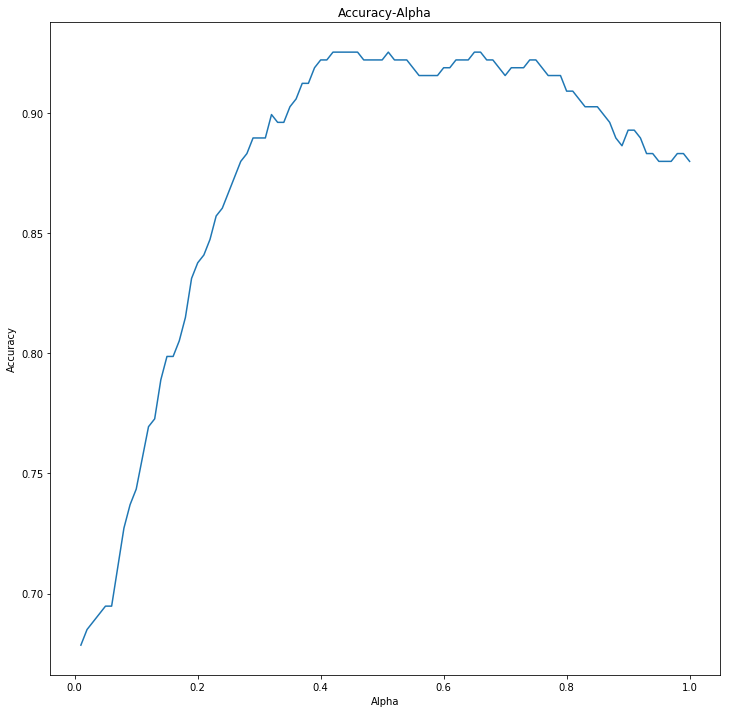

Max accuracy at alpha = 0.42 with accuracy of 0.9253246753246753


In [10]:
import matplotlib.pyplot as plt
def show_plot(x_data, y_data, x_label, y_label, title):
    plt.subplots(figsize=(12, 12))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_data, y_data)
    plt.title(title)
    plt.show()
    
show_plot([i/100 for i in range(1, 101)], results, 'Alpha', 'Accuracy', 'Accuracy-Alpha')

def get_max_alpha(arr):
    max_a = 0
    max_acc = 0
    for i, acc in enumerate(arr):
        if acc > max_acc:
            max_a = (i+1) / 100
            max_acc = acc
    return max_a, max_acc
            
alp_acc = get_max_alpha(results)
print("Max accuracy at alpha = {} with accuracy of {}".format(alp_acc[0], alp_acc[1]))

# Choosing alpha = 0.42 as best accuracy

In [11]:
alpha = 0.42
training_data = norm_merge(X_traing_hists_reduced, traing_data_sift_hist, alpha)
validation_data = norm_merge(X_valid_hists_reduced, valid_data_sift_hist, alpha)
Linear_SVM_classification(training_data, validation_data, y_training, y_validation)

[LibLinear]Linear SVC accuracy: 0.9253246753246753


0.9253246753246753

In [12]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

def confusion_matrix(model, X_test, y_test, title):
    fig, ax = plt.subplots(figsize=(12, 12))
    disp = plot_confusion_matrix(model, X_test, y_test,
                                cmap=plt.cm.Blues,
                                normalize='true', ax=ax)
    disp.ax_.set_title('Confusion matrix: ' + title)

[LibLinear]Linear SVC accuracy: 0.9253246753246753


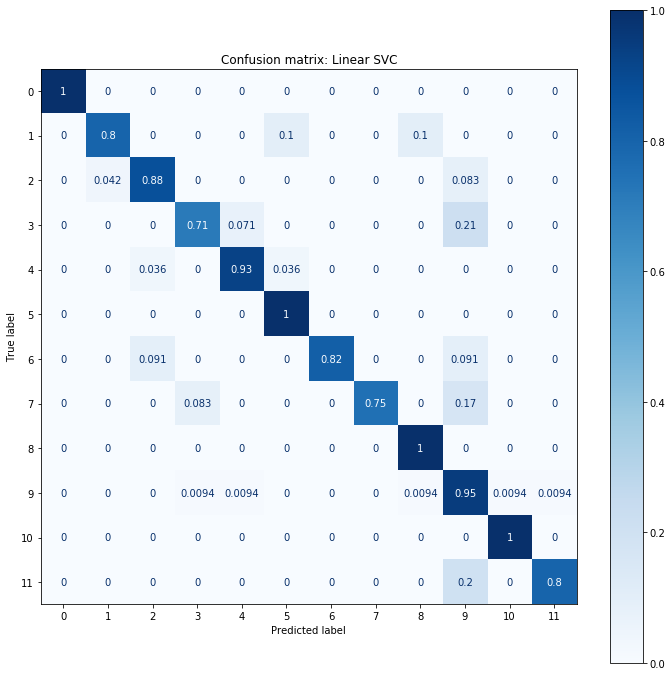

In [13]:
def Linear_SVM_classification_G(X_train, X_test, y_train, y_test):
    #LinearSVC
    from sklearn.svm import LinearSVC

    svc= LinearSVC(C=100.0, random_state=42, max_iter=1000, verbose=1)
    svc.fit(X_train, y_train)

    svcpred = svc.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, svcpred)
    SVC_acc = metrics.accuracy_score(y_test, svcpred)

    confusion_matrix(svc, X_test, y_test, "Linear SVC")
    return SVC_acc
        
acc = Linear_SVM_classification_G(training_data, validation_data, y_training, y_validation)
print('Linear SVC accuracy: {}'.format(acc))


Random Forest Accuracy: 0.6948051948051948


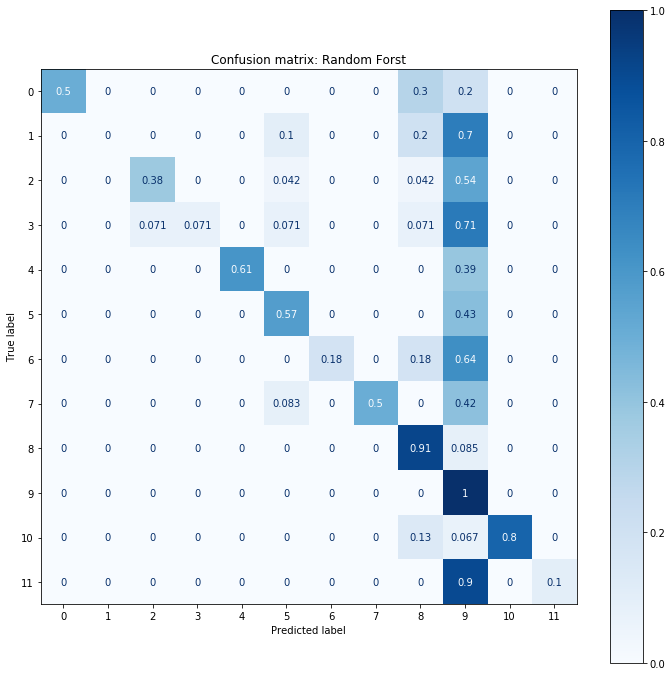

In [14]:
def RF_classification(X_train, X_test, y_train, y_test):
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(n_estimators = 100)
    clf.fit(X_train, y_train)

    pred = clf.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, pred)
    RF_acc = metrics.accuracy_score(y_test, pred)

    print("Random Forest Accuracy:", RF_acc)
    confusion_matrix(clf, X_test, y_test, "Random Forst")
    
RF_classification(training_data, validation_data, y_training, y_validation)

SVC (kernel = linear):  0.8993506493506493
SVC (kernel = poly):  0.3474025974025974
SVC (kernel = rbf):  0.7305194805194806
SVC (kernel = sigmoid):  0.8733766233766234


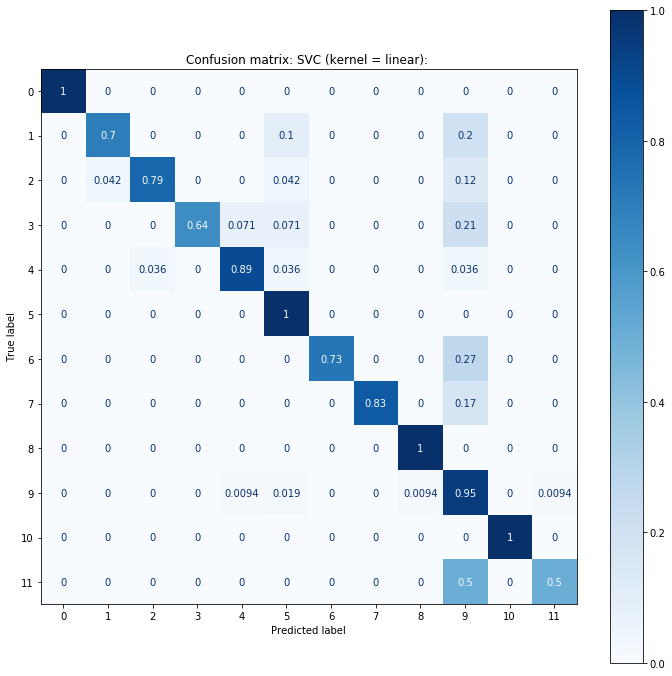

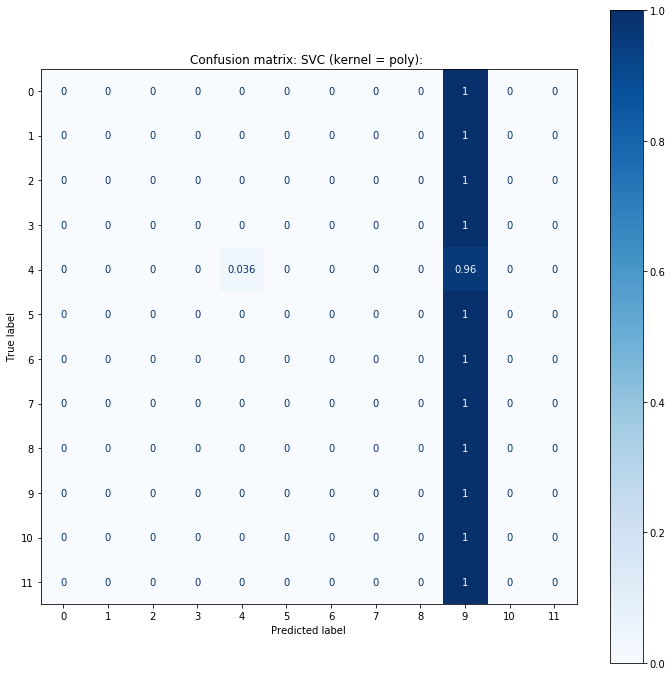

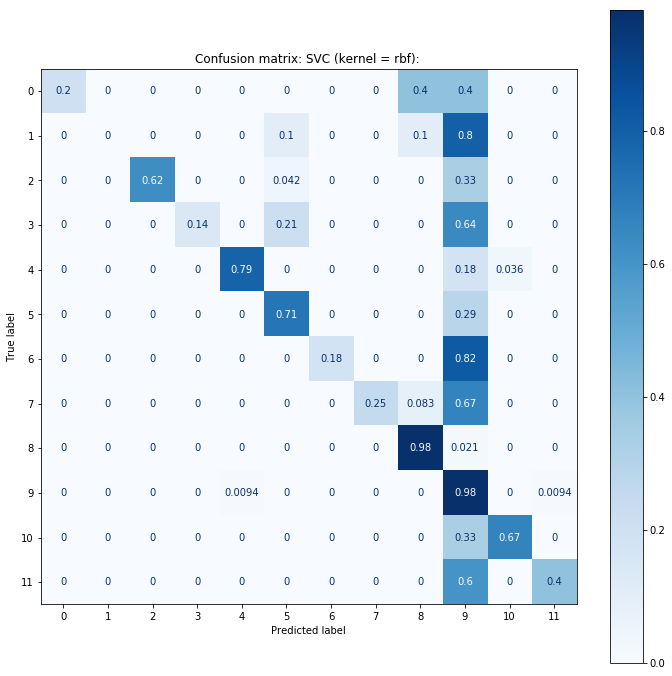

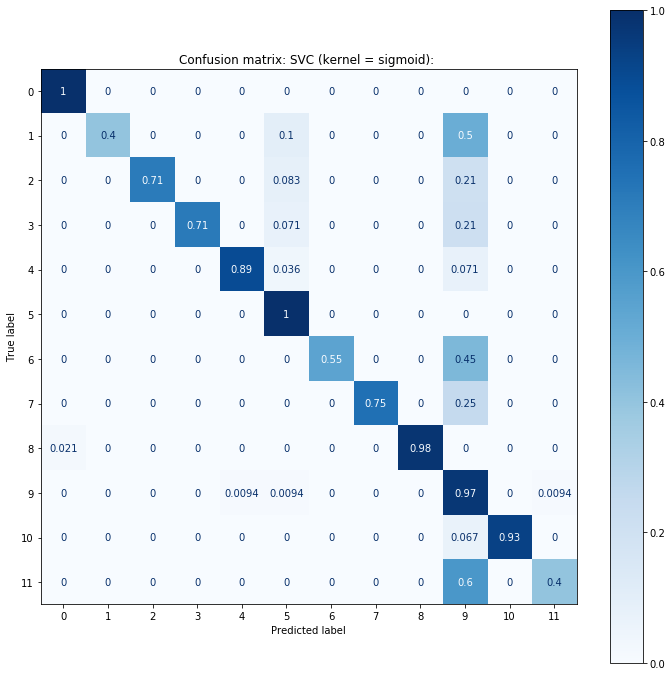

In [15]:
def SVM_classification(X_train, X_test, y_train, y_test):
    #SVM
    from sklearn.svm import SVC

    for kernel in ('linear', 'poly', 'rbf', 'sigmoid'):
        svc= SVC(kernel = kernel)

        svc.fit(X_train, y_train)
        svcpred = svc.predict(X_test)
        cnf_matrix = metrics.confusion_matrix(y_test, svcpred)
        SVC_acc = metrics.accuracy_score(y_test, svcpred)

        print('SVC (kernel = {}): '.format(kernel),SVC_acc)
        title = 'SVC (kernel = {}): '.format(kernel)
        confusion_matrix(svc, X_test, y_test, title)
        
SVM_classification(training_data, validation_data, y_training, y_validation)